<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/HW4/ExamScore_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1 read in the data and explore its properties

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/refs/heads/main/StudentPerformanceFactors_modified.csv")

In [ ]:
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,NaN,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0


# task 2 generate a restricted dataset that only contains the numerical columns

In [ ]:
df_restricted = df.select_dtypes(include='number')

In [ ]:
#df_restricted = df[[c for c in df.columns if df[c].dtype == 'float64']]

In [ ]:
df_restricted.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6527.000000,6521.000000,6526.000000,6528.000000,6523.000000,6518.000000,6525.000000
mean,19.984832,79.990799,7.028042,75.067096,1.493791,2.966247,67.240307
std,5.993324,11.546369,1.469583,14.397116,1.231580,1.031094,3.882296
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


REMEMBER YOU NEED A CAPTION

In [ ]:
df_restricted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours_Studied      6527 non-null   float64
 1   Attendance         6521 non-null   float64
 2   Sleep_Hours        6526 non-null   float64
 3   Previous_Scores    6528 non-null   float64
 4   Tutoring_Sessions  6523 non-null   float64
 5   Physical_Activity  6518 non-null   float64
 6   Exam_Score         6525 non-null   float64
dtypes: float64(7)
memory usage: 361.4 KB


# task 3 investigate and remove missing values

<Axes: >

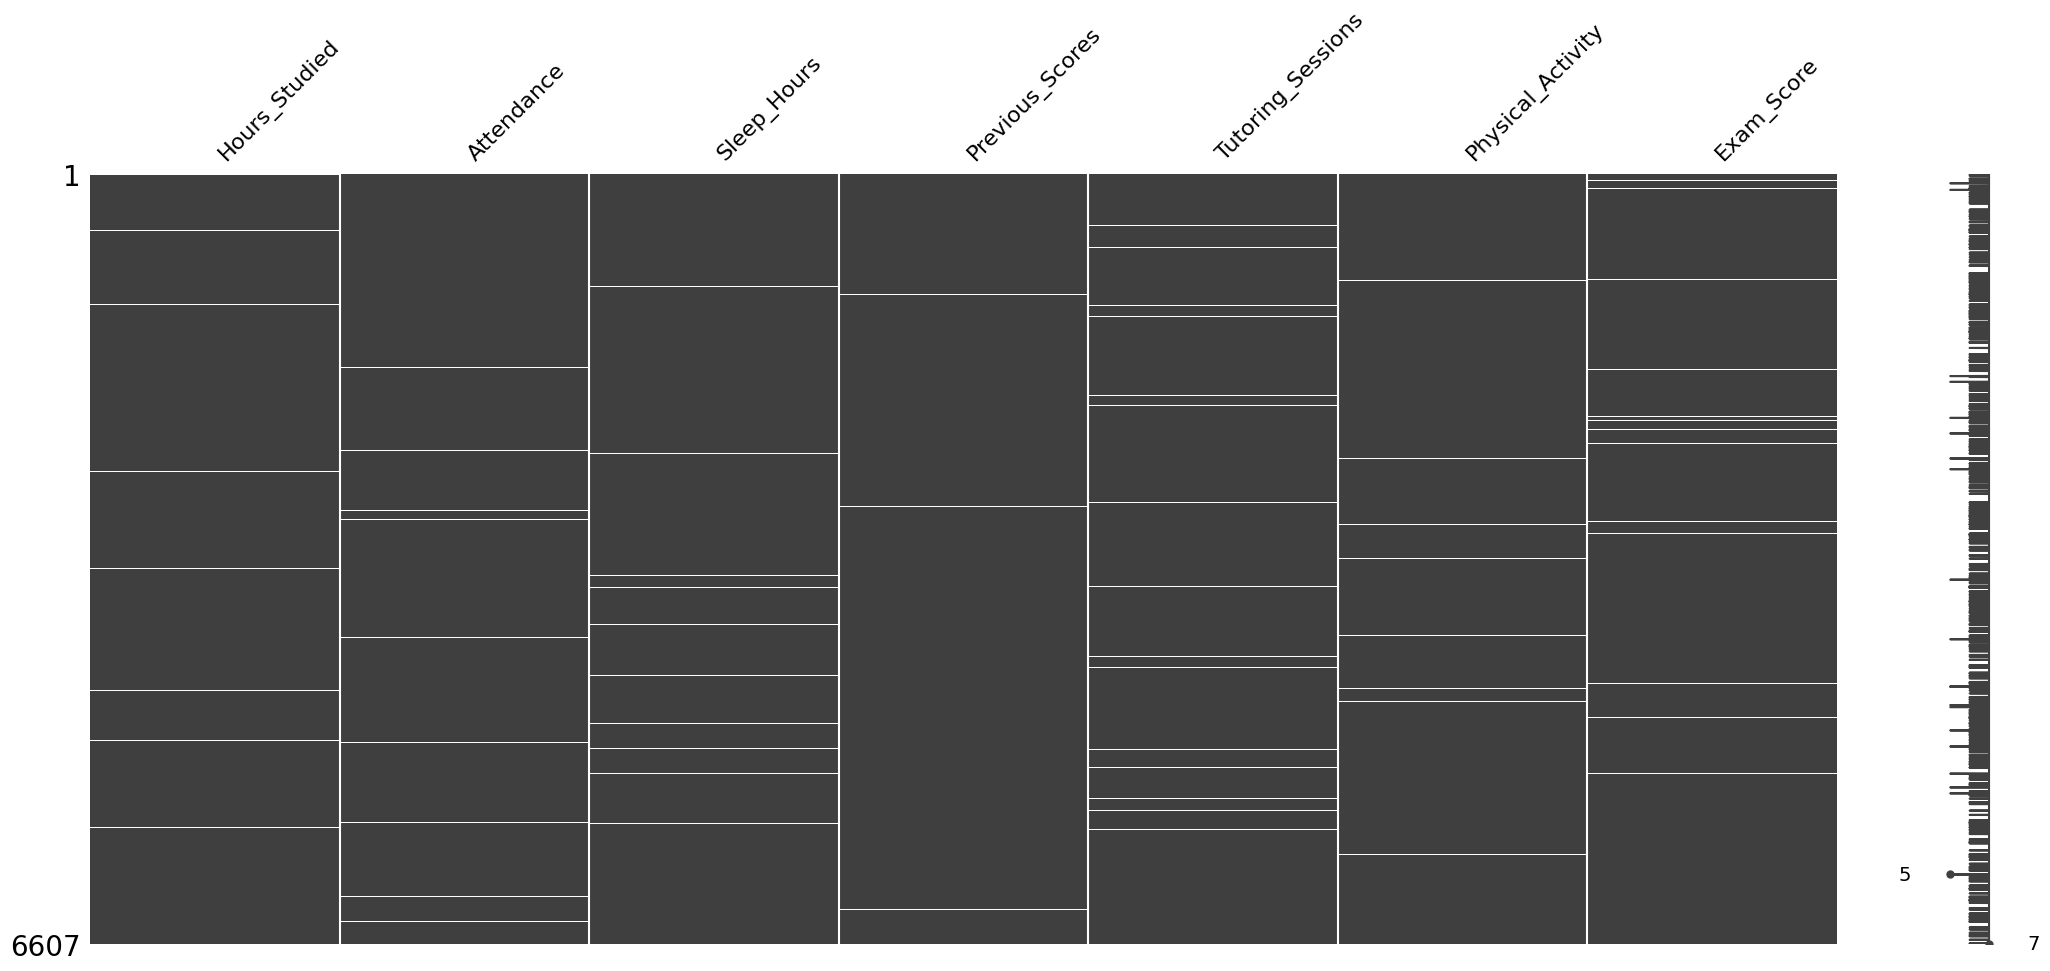

In [ ]:
import missingno as msno
msno.matrix(df_restricted)

REMEMBER YOU NEED A CAPTION

<Axes: >

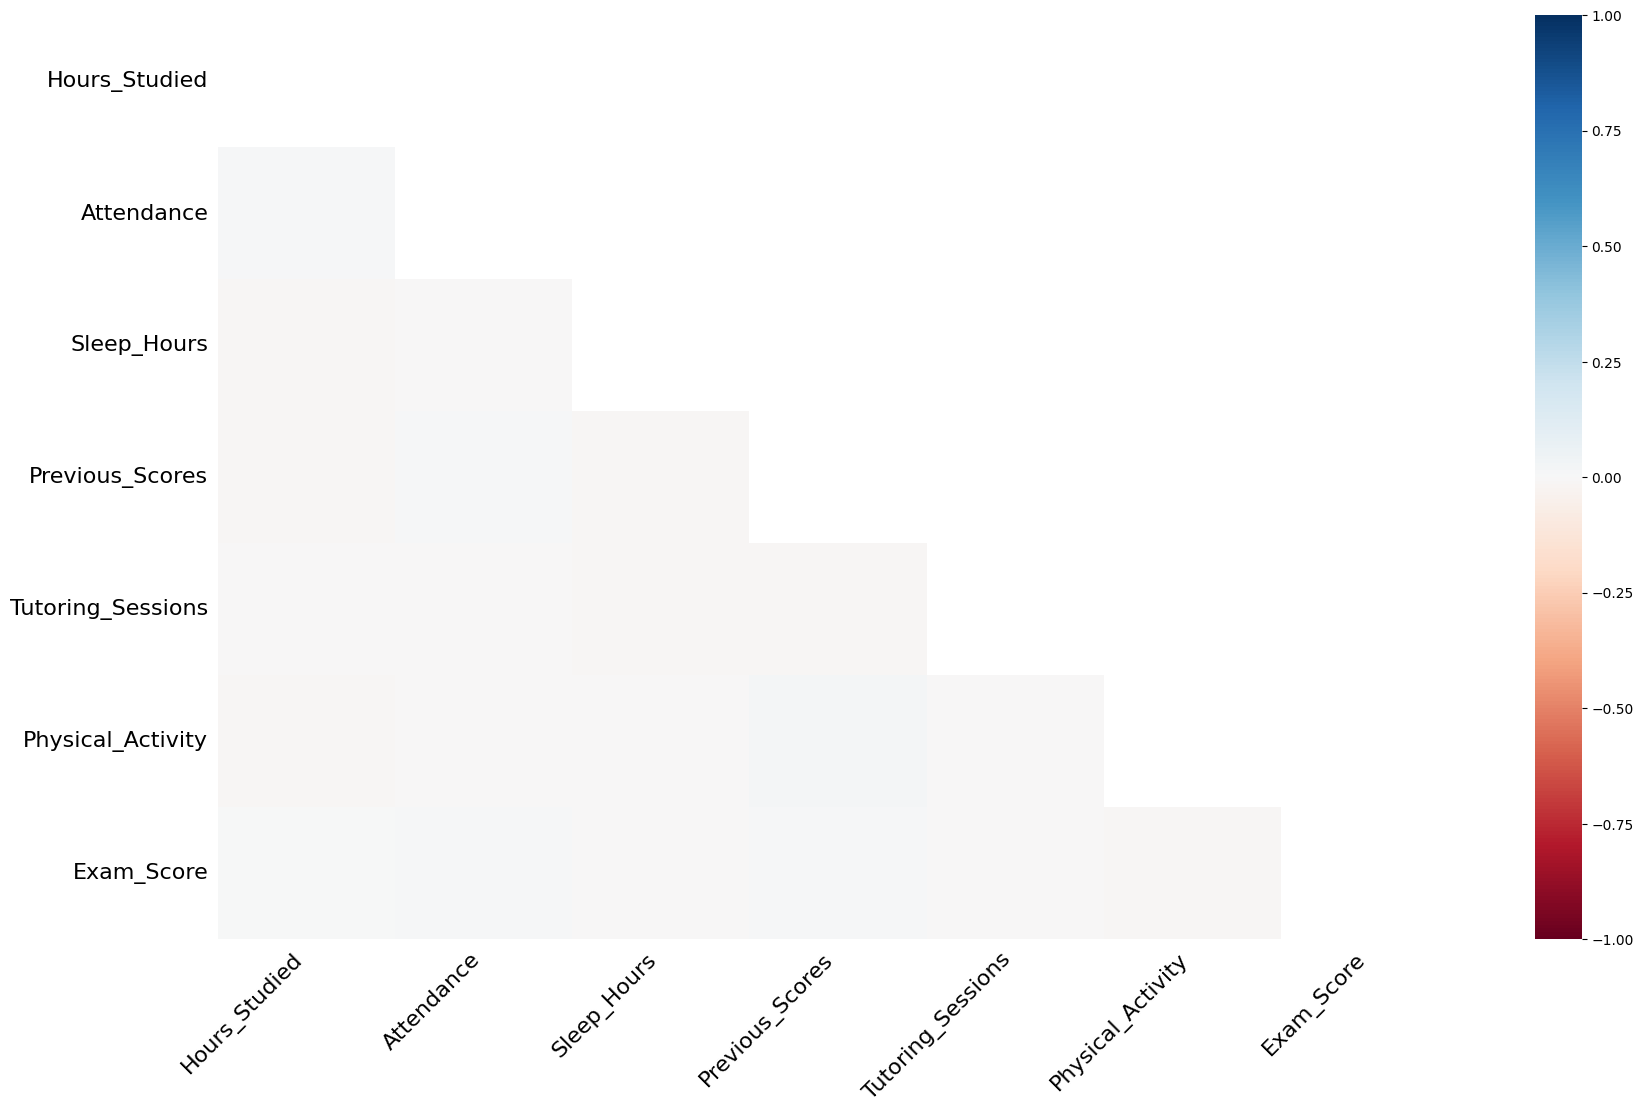

In [ ]:
msno.heatmap(df_restricted)

REMEMBER YOU NEED A CAPTION

In [ ]:
df_restricted.isnull().sum()

,0
Hours_Studied,80
Attendance,86
Sleep_Hours,81
Previous_Scores,79
Tutoring_Sessions,84
Physical_Activity,89
Exam_Score,82


In [ ]:
#df_restricted.fillna(df_restricted.mean(), inplace=True)

In [ ]:
df_restricted.dropna(inplace=True)

In [ ]:
df_restricted.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Tutoring_Sessions,0
Physical_Activity,0
Exam_Score,0


In [ ]:
df_restricted.shape

(6046, 7)

# task 4 report what percentage of data you lost by cleaning nans

In [ ]:
print("percentage of lost  {:.2f}% of the data".format((df.shape[0] - df_restricted.shape[0]) / df.shape[0] * 100))

percentage of lost  8.49% of the data


# task 5 show the distribution of each column

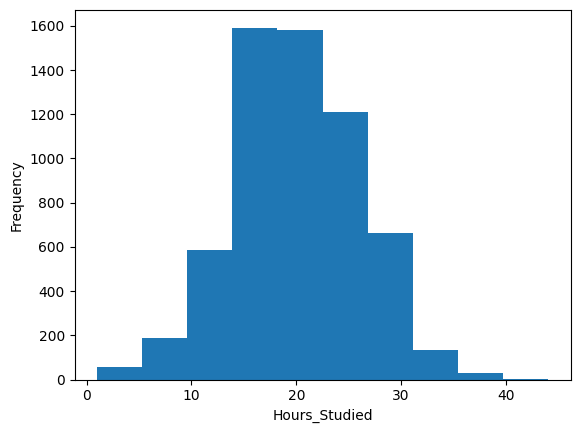

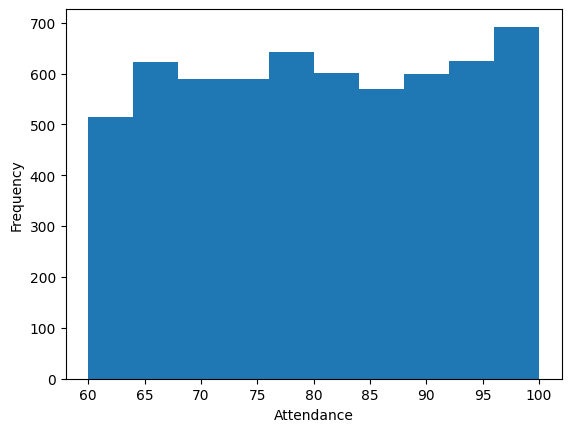

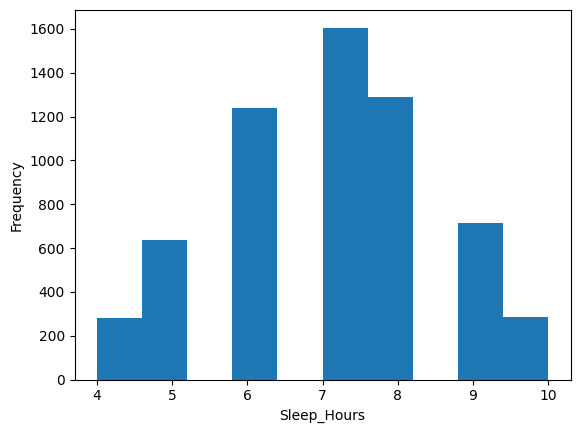

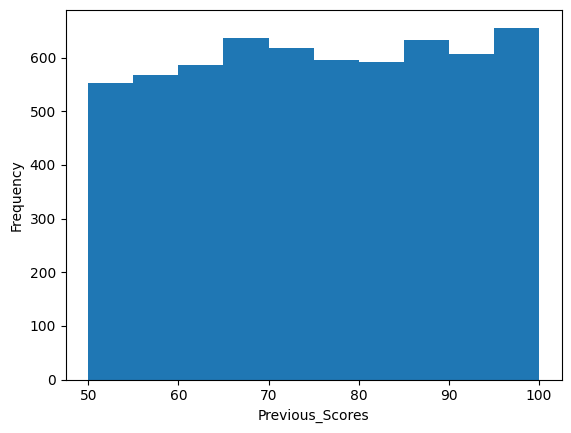

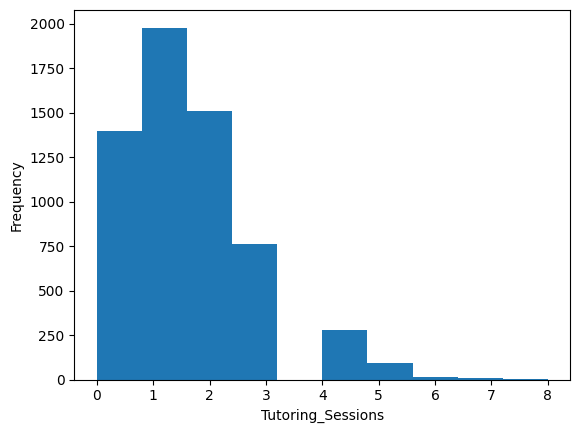

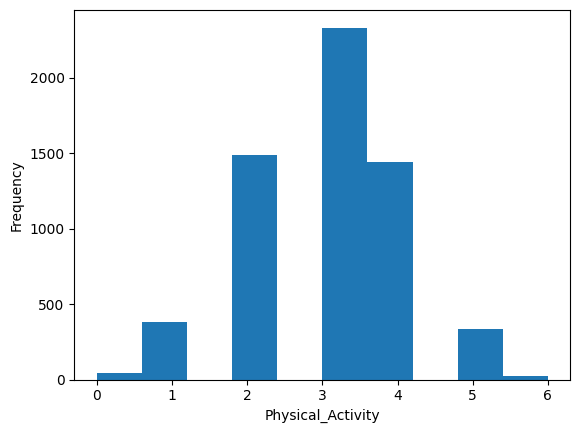

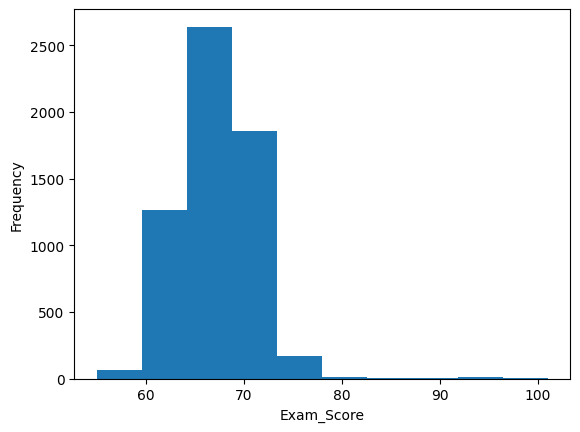

In [ ]:
for c in df_restricted.columns:
  plt.figure()
  plt.hist(df_restricted[c])
  plt.xlabel(c)
  plt.ylabel("Frequency")

REMEMBER YOU NEED A CAPTION


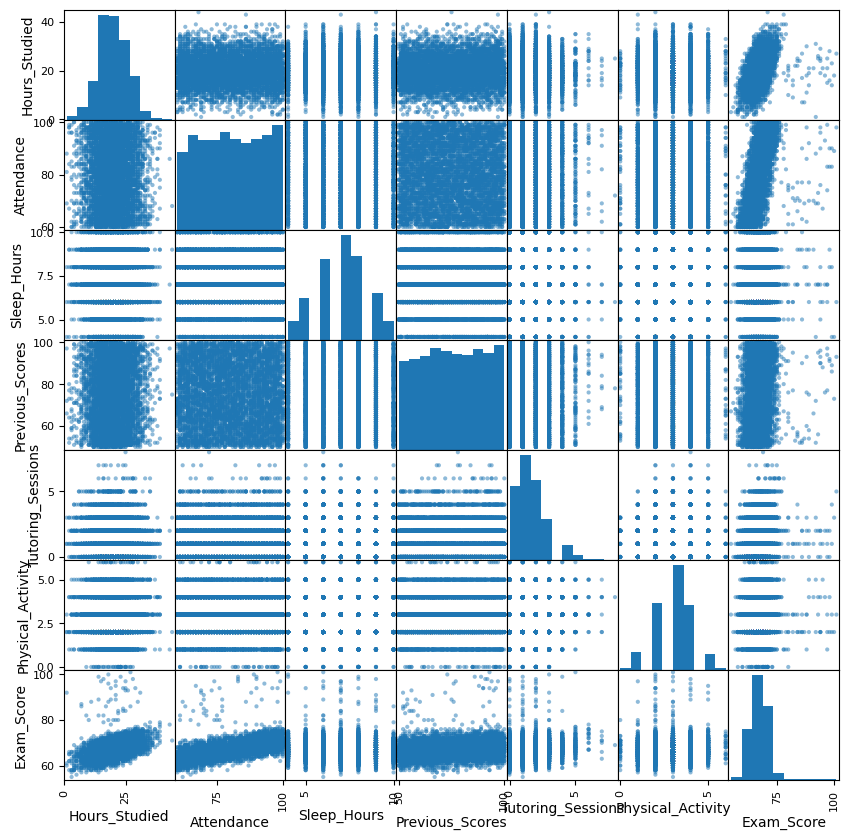

In [ ]:
pd.plotting.scatter_matrix(df_restricted, figsize=(10, 10));

REMEMBER YOU NEED A CAPTION

# task 5 correlation analysis

In [ ]:
df_restricted.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.003900,0.012723,0.024901,-0.015869,0.004054,0.450620
Attendance,-0.003900,1.000000,-0.018557,-0.020674,0.013621,-0.023127,0.584348
Sleep_Hours,0.012723,-0.018557,1.000000,-0.018262,-0.011764,-0.002211,-0.015263
Previous_Scores,0.024901,-0.020674,-0.018262,1.000000,-0.009819,-0.003199,0.175748
Tutoring_Sessions,-0.015869,0.013621,-0.011764,-0.009819,1.000000,0.015373,0.157459
Physical_Activity,0.004054,-0.023127,-0.002211,-0.003199,0.015373,1.000000,0.028710
Exam_Score,0.450620,0.584348,-0.015263,0.175748,0.157459,0.028710,1.000000


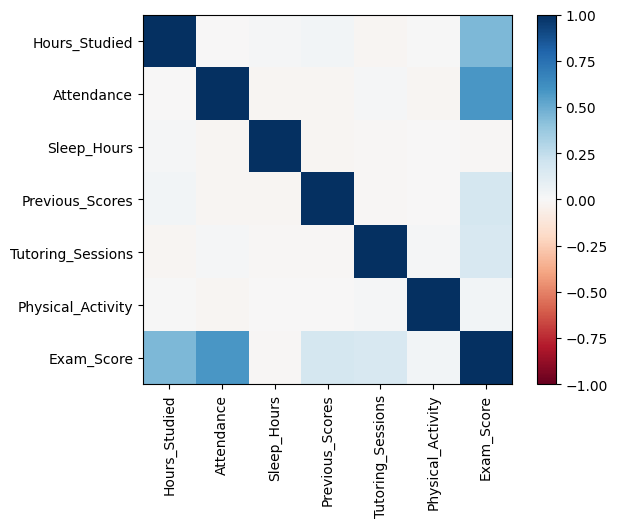

In [ ]:
import pylab as plt
plt.imshow(df_restricted.corr(), clim=(-1, 1), cmap='RdBu')
plt.colorbar()
plt.xticks(range(len(df_restricted.columns)), df_restricted.columns, rotation=90)
plt.yticks(range(len(df_restricted.columns)), df_restricted.columns)
plt.show()

REMEMBER YOU NEED A CAPTION

# task 6 Make a linear regression model to predict "Exam_Score" using as exogenous variable the most highly correlated variable in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score

# task 7 Make a multilinear regression model to predict "Exam_Score" using as exogenous variables the two most highly correlated variables in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score

# task 8 Make a multilinear regression model to predict "Exam_Score" using variables in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score